# TrackML DS Project 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense  
from keras import backend as K
import trackml
from sklearn import metrics

### Load first event data for training and inspect contents of the data

In [8]:
# training dataset - one event
from trackml.dataset import load_event

hits_first, cells_first, particles_first, truth_first = load_event('../TrackML-Data/train_100_events/event000001000')

hits_first

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1
...,...,...,...,...,...,...,...
120934,120935,-763.862976,51.569401,2944.5,18,12,97
120935,120936,-808.705017,3.459260,2944.5,18,12,97
120936,120937,-982.935974,41.460899,2952.5,18,12,98
120937,120938,-942.698975,18.489100,2952.5,18,12,98


In [5]:
cells_first

,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087
4,3,58,954,0.034005
...,...,...,...,...
664991,120936,122,5,1.000000
664992,120936,123,5,1.000000
664993,120937,430,11,1.000000
664994,120938,260,7,1.000000


In [6]:
truth_first

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.000000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.492200,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.000000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.702320,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.573180,0.000009
...,...,...,...,...,...,...,...,...,...
120934,120935,445864815605317632,-763.383972,51.544998,2944.5,-1.640200,0.208933,6.293810,0.000018
120935,120936,900720956266250240,-804.664978,3.186900,2944.5,-0.315684,-0.094259,1.328200,0.000007
120936,120937,238705348779704320,-986.989014,41.731300,2952.5,-0.212508,0.095667,0.731932,0.000009
120937,120938,373800349619716096,-947.005005,18.764999,2952.5,-0.165762,-0.103945,0.800783,0.000007


In [8]:
# inspect structure of cells data
for i in range(10):
    print(cells_first['hit_id'][i], cells_first['value'][i])
print(cells_first)

1 0.0138317
1 0.0798866
1 0.211723
2 0.334087
3 0.0340049
3 0.00779792
3 0.0198969
3 0.0999644
3 0.0655761
3 0.0186967
        hit_id  ch0  ch1     value
0            1  209  617  0.013832
1            1  210  617  0.079887
2            1  209  618  0.211723
3            2   68  446  0.334087
4            3   58  954  0.034005
...        ...  ...  ...       ...
664991  120936  122    5  1.000000
664992  120936  123    5  1.000000
664993  120937  430   11  1.000000
664994  120938  260    7  1.000000
664995  120939  134    5  1.000000

[664996 rows x 4 columns]


In [3]:
# detector information
detectors = pd.read_csv("../TrackML-Data/detectors.csv")
detectors

,volume_id,layer_id,module_id,cx,cy,cz,rot_xu,rot_xv,rot_xw,rot_yu,...,rot_yw,rot_zu,rot_zv,rot_zw,module_t,module_minhu,module_maxhu,module_hv,pitch_u,pitch_v
0,7,2,1,-65.7965,-5.17830,-1502.5,0.078459,-0.996917,0.0,-0.996917,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
1,7,2,2,-139.8510,-6.46568,-1502.0,0.046184,-0.998933,0.0,-0.998933,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
2,7,2,3,-138.6570,-19.34190,-1498.0,0.138156,-0.990410,0.0,-0.990410,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
3,7,2,4,-64.1764,-15.40740,-1498.0,0.233445,-0.972370,0.0,-0.972370,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
4,7,2,5,-136.2810,-32.05310,-1502.0,0.228951,-0.973438,0.0,-0.973438,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18723,18,12,94,-895.8950,291.09400,2952.5,0.309017,-0.951057,0.0,0.951057,...,0.0,0,0,1,0.35,66.0,72.0,78,0.12,10.40000
18724,18,12,95,-812.0900,161.53500,2947.5,0.195090,-0.980785,0.0,0.980785,...,0.0,0,0,1,0.35,54.0,64.2,78,0.12,10.40000
18725,18,12,96,-925.3150,176.51300,2955.5,0.187381,-0.982287,0.0,0.982287,...,0.0,0,0,1,0.35,66.0,72.0,78,0.12,10.40000
18726,18,12,97,-826.2270,54.15380,2944.5,0.065403,-0.997859,0.0,0.997859,...,0.0,0,0,1,0.35,54.0,64.2,78,0.12,10.40000


In [3]:
# add up channel count and value for each hit-id
def cells_input_data(cells_given):
    current_id = cells_given['hit_id'][0]
    cells_count = 1
    value_count = cells_given['value'][0]
    cells_list = []
    value_list = []

    for row in range(1, len(cells_given['hit_id'])):
        hit_id = cells_given['hit_id'][row]
        hit_value = cells_given['value'][row]
        if (hit_id != current_id):
            cells_list.append(cells_count)
            value_list.append(value_count)
            current_id = hit_id
            cells_count = 1
            value_count = hit_value
        else:
            cells_count += 1
            value_count += hit_value

    cells_list.append(cells_count)
    value_list.append(value_count)

    cells_arr = np.array(cells_list)
    value_arr = np.array(value_list)
    return (cells_arr, value_arr)

cells_arr_first, value_arr_first = cells_input_data(cells_first)
print(cells_arr_first.shape)

(120939,)


Choice of inputs for each hit
- x,y,z coordinates
- sum of values from cells, count of number of cells
- shortest distance of joining line between the hits to the origin

In [5]:
# construct NN input data and truth information for training/testing
def X_y_train_construct(hit_pairs, hits, cells_arr, value_arr):
    N_pairs = len(hit_pairs)
    N_parameters_pair = 5*2 + 1
    X_train = np.empty((N_pairs, N_parameters_pair))
    y_train = np.empty(N_pairs, dtype=bool)

    for pair in range(N_pairs):
        hit1 = hit_pairs[pair][0]
        hit2 = hit_pairs[pair][1]
        y_train[pair] = hit_pairs[pair][2]
        # x,y,z
        X_train[pair][0] = hits['x'][hit1]/3000
        X_train[pair][1] = hits['y'][hit1]/3000
        X_train[pair][2] = hits['z'][hit1]/3000
        # number of cells sum
        X_train[pair][3] = cells_arr[hit1]/10
        # sum of charge values
        X_train[pair][4] = value_arr[hit1]
        #same for hit2
        X_train[pair][5] = hits['x'][hit2]/3000
        X_train[pair][6] = hits['y'][hit2]/3000
        X_train[pair][7] = hits['z'][hit2]/3000
        X_train[pair][8] = cells_arr[hit2]/10
        X_train[pair][9] = value_arr[hit2]
        
        # joining line distance from origin
        hit1_point = np.array([hits['x'][hit1],hits['y'][hit1],hits['z'][hit1]])
        hit2_point = np.array([hits['x'][hit2],hits['y'][hit2],hits['z'][hit2]])
        line_dir_vector = hit1_point - hit2_point
        cross_dir_point = np.cross(hit1_point,line_dir_vector)
        shortest_distance_origin = np.sqrt(cross_dir_point.dot(cross_dir_point))/np.sqrt(line_dir_vector.dot(line_dir_vector))
        
        X_train[pair][10] = shortest_distance_origin/500

    return (X_train, y_train)

### Filter dataset with shortest distance from origin upper bound (not used in the end)

In [80]:
# construct filtered dataset
N_hits = 5000
N_pairs = ((N_hits)**2-N_hits)/2 # unique pairs
hit1_pairs = np.empty(int(N_pairs), dtype=np.uintc)
hit2_pairs = np.empty(int(N_pairs), dtype=np.uintc)
pair_counter = 0

# iterate over all possible hit pairs
for hit1 in range(N_hits):
    for hit2 in range(hit1+1,N_hits):
        # fit line to pair and filter by distance from origin
        hit1_point = np.array([hits['x'][hit1],hits['y'][hit1],hits['z'][hit1]])
        hit2_point = np.array([hits['x'][hit2],hits['y'][hit2],hits['z'][hit2]])
        line_dir_vector = hit1_point - hit2_point
        cross_dir_point = np.cross(hit1_point,line_dir_vector)
        shortest_distance_origin = np.sqrt(cross_dir_point.dot(cross_dir_point))/np.sqrt(line_dir_vector.dot(line_dir_vector))
        
        # add pair to dataset if in radius of 60mm/6cm
        if (shortest_distance_origin < 50):
            hit1_pairs[pair_counter] = hit1
            hit2_pairs[pair_counter] = hit2
            pair_counter += 1
    if (hit1%100==0):
        print(hit1)
        
print(len(hit1_pairs))
print(pair_counter)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
12497500
66839


In [81]:
# set-up truth info and check pair sample
hit_pairs = np.empty(int(pair_counter), dtype=object)
truth_pairs = np.empty(int(pair_counter), dtype=bool) # 1 for same track, 0 for not
count_true = 0
for pair in range(pair_counter):
    hit_1 = hit1_pairs[pair]
    hit_2 = hit2_pairs[pair]
    hit_pairs[pair] = (hit_1,hit_2)
    hit1_particle_id = truth['particle_id'][hit_1]
    hit2_particle_id = truth['particle_id'][hit_2]
    if (hit1_particle_id == hit2_particle_id):
        truth_pairs[pair] = 1
        count_true += 1
    else:
        truth_pairs[pair] = 0

np.save("hits_pairs", hit_pairs)
np.save("truth_pairs", truth_pairs)
print(count_true)

7814


In [9]:
# get filtered hit pairs from saved arrays
hit_pairs = np.load("hits_pairs.npy", allow_pickle=True)
truth_pairs = np.load("truth_pairs.npy")
print(len(hit_pairs))

66839


In [10]:
# input paramters for a single pair
hit1 = hit_pairs[0][0]
hit2 = hit_pairs[0][1]
print(hit1,hit2)
print("Hit 1 x/3000: ", hits_first['x'][hit1]/3000)
print("Hit 1 y/3000: ", hits_first['y'][hit1]/3000)
print("Hit 1 y/3000: ", hits_first['z'][hit1]/3000)
print("Hit 1 cell count/10: ", cells_arr[hit1]/10)
print("Hit 1 value sum: ", value_arr[hit1])
print("Hit 2 x/3000: ", hits_first['x'][hit2]/3000)
print("Hit 2 y/3000: ", hits_first['y'][hit2]/3000)
print("Hit 2 y/3000: ", hits_first['z'][hit2]/3000)
print("Hit 2 cell count/10: ", cells_arr[hit2]/10)
print("Hit 2 value sum: ", value_arr[hit2])

0 1451


NameError: name 'hits' is not defined

In [22]:
# construct input for NN
N_pairs = len(hit_pairs)
N_parameters_pair = 5*2
X_train = np.empty((N_pairs, N_parameters_pair))

for pair in range(N_pairs):
    hit1 = hit_pairs[pair][0]
    hit2 = hit_pairs[pair][1]
    X_train[pair][0] = hits['x'][hit1]/3000
    X_train[pair][1] = hits['y'][hit1]/3000
    X_train[pair][2] = hits['z'][hit1]/3000
    X_train[pair][3] = cells_arr[hit1]/10
    X_train[pair][4] = value_arr[hit1]
    X_train[pair][5] = hits['x'][hit2]/3000
    X_train[pair][6] = hits['y'][hit2]/3000
    X_train[pair][7] = hits['z'][hit2]/3000
    X_train[pair][8] = cells_arr[hit2]/10
    X_train[pair][9] = value_arr[hit2]
    
print(X_train.shape)
print(truth_pairs.shape)

In [77]:
# construct NN architecture and train
model = Sequential()
model.add(Dense(500, input_dim=10, activation='relu', kernel_regularizer=None))
model.add(Dense(300, activation='relu', kernel_regularizer=None))
model.add(Dense(300, activation='relu', kernel_regularizer=None))
model.add(Dense(100, activation='relu', kernel_regularizer=None))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')   
model.fit(X_train, truth_pairs, epochs=10, batch_size=50, verbose=1)

Epoch 1/10
1808/1808 [==============================] - 4s 2ms/step - loss: 0.2642
Epoch 2/10
1808/1808 [==============================] - 3s 2ms/step - loss: 0.2480
Epoch 3/10
1808/1808 [==============================] - 3s 2ms/step - loss: 0.2385
Epoch 4/10
1808/1808 [==============================] - 3s 2ms/step - loss: 0.2357
Epoch 5/10
1808/1808 [==============================] - 3s 2ms/step - loss: 0.2356
Epoch 6/10
1808/1808 [==============================] - 3s 2ms/step - loss: 0.2375
Epoch 7/10
1808/1808 [==============================] - 3s 2ms/step - loss: 0.2330
Epoch 8/10
1808/1808 [==============================] - 3s 2ms/step - loss: 0.2361
Epoch 9/10
1808/1808 [==============================] - 3s 2ms/step - loss: 0.2316
Epoch 10/10
1808/1808 [==============================] - 3s 2ms/step - loss: 0.2354


In [78]:
pred_train = model.predict(X_train)

2825/2825 [==============================] - 3s 876us/step


In [79]:
pred_train_confusion = (pred_train > 0.65)
truth_pairs_confusion = np.reshape(truth_pairs, (len(truth_pairs),1))

confusion_train = metrics.confusion_matrix(truth_pairs, pred_train_confusion)
accuracy = metrics.accuracy_score(truth_pairs, pred_train_confusion)

print(confusion_train)
print(accuracy)

[[82503    16]
 [ 6319  1559]]
0.9299202407159529


### Brute force training set with truth information

In [11]:
# brute force dataset for 50/50 of 0 and 1
def brute_dataset(N_brute, hits, truth):
    N_hits = len(hits['hit_id'])
    hit_pairs_match = np.empty(N_brute, dtype=object)
    hit_pairs_miss = np.empty(N_brute, dtype=object)
    match_pair_counter = 0
    miss_pair_counter = 0
    
    for hit1 in range(N_hits):
        for hit2 in range(hit1+1,N_hits):
            if (match_pair_counter == N_brute) and (miss_pair_counter == N_brute):
                return np.append(hit_pairs_match, hit_pairs_miss)
            
            hit1_particle_id = truth['particle_id'][hit1]
            hit2_particle_id = truth['particle_id'][hit2]
            
            if (hit1_particle_id == hit2_particle_id):
                if (match_pair_counter < N_brute):
                    hit_pairs_match[match_pair_counter] = (hit1,hit2,1)
                    match_pair_counter += 1
            else:
                if (miss_pair_counter < N_brute):
                    hit_pairs_miss[miss_pair_counter] = (hit1,hit2,0)
                    miss_pair_counter += 1

In [6]:
hit_pairs_brute = brute_dataset(200000, hits, truth)
np.random.shuffle(hit_pairs_brute)
print(hit_pairs_brute.shape)

(400000,)


In [7]:
X_train_brute, y_train_brute = X_y_train_construct(hit_pairs_brute, hits, cells_arr, value_arr)
print(X_train_brute.shape)
print(y_train_brute.shape)

(400000, 11)
(400000,)


In [8]:
# construct NN architecture and train
model = Sequential()
model.add(Dense(1000, input_dim=11, activation='relu', kernel_regularizer=None))
model.add(Dense(500, activation='relu', kernel_regularizer=None))
model.add(Dense(500, activation='relu', kernel_regularizer=None))
model.add(Dense(500, activation='relu', kernel_regularizer=None))
model.add(Dense(250, activation='relu', kernel_regularizer=None))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')   
model.fit(X_train_brute, y_train_brute, epochs=8, batch_size=100, verbose=1)

Epoch 1/8
4000/4000 [==============================] - 27s 7ms/step - loss: 0.1673
Epoch 2/8
4000/4000 [==============================] - 26s 6ms/step - loss: 0.1311
Epoch 3/8
4000/4000 [==============================] - 26s 6ms/step - loss: 0.1107
Epoch 4/8
4000/4000 [==============================] - 26s 6ms/step - loss: 0.1089
Epoch 5/8
4000/4000 [==============================] - 25s 6ms/step - loss: 0.1028
Epoch 6/8
4000/4000 [==============================] - 25s 6ms/step - loss: 0.1027
Epoch 7/8
4000/4000 [==============================] - 25s 6ms/step - loss: 0.0991
Epoch 8/8
4000/4000 [==============================] - 26s 6ms/step - loss: 0.0978


In [9]:
pred_train_brute = model.predict(X_train_brute)

12500/12500 [==============================] - 20s 2ms/step


In [12]:
pred_train_confusion_brute = (pred_train_brute > 0.7)

confusion_train = metrics.confusion_matrix(y_train_brute, pred_train_confusion_brute)
accuracy = metrics.accuracy_score(y_train_brute, pred_train_confusion_brute)

print(confusion_train)
print(accuracy)

[[199940     60]
 [ 17963 182037]]
0.9549425


### Train NN with hit pairs mixed from multiple events (final used method)

In [12]:
# Load 10 000 hit pairs of first 20 events as train data
def multiple_events_brute(N_events, N_hits_event, start_event):
    for event in range(N_events):
        event_id = 1000 + start_event + event
        # load event
        hits_event, cells_event, particles_even, truth_event = load_event(f'../TrackML-Data/train_100_events/event00000{event_id}')
        # hit pairs for event
        hit_pairs_event = brute_dataset(N_hits_event, hits_event, truth_event)
        np.random.shuffle(hit_pairs_event)
        # cells input for event
        cells_arr_event, value_arr_event = cells_input_data(cells_event)
        # train data for event
        X_train_event, y_train_event = X_y_train_construct(hit_pairs_event, hits_event, cells_arr_event, value_arr_event)
        # append to full train dataset
        if (event == 0):
            X_train_mult_events = X_train_event
            y_train_mult_events = y_train_event
        else:
            X_train_mult_events = np.append(X_train_mult_events, X_train_event, axis=0)
            y_train_mult_events = np.append(y_train_mult_events, y_train_event)

    print(X_train_mult_events.shape)
    print(y_train_mult_events.shape)
    
    return (X_train_mult_events, y_train_mult_events)

# np.save("X_train_mult_events", X_train_mult_events)
# np.save("y_train_mult_events", y_train_mult_events)

In [77]:
N_hits_train = 20000
X_train_mult_events, y_train_mult_events = multiple_events_brute(20,N_hits_train,0)

(800000, 11)
(800000,)


In [13]:
# load saved data
X_train_mult_events = np.load("X_train_mult_events.npy")
y_train_mult_events = np.load("y_train_mult_events.npy")

print(X_train_mult_events.shape)
print(y_train_mult_events.shape)

(400000, 11)
(400000,)


In [78]:
# train model from mixed events
model_mult = Sequential()
model_mult.add(Dense(2000, input_dim=11, activation='selu'))
model_mult.add(Dense(1000, activation='selu'))
model_mult.add(Dense(1000, activation='selu'))
model_mult.add(Dense(1000, activation='selu'))
model_mult.add(Dense(500, activation='selu'))
model_mult.add(Dense(1, activation='sigmoid'))
model_mult.compile(loss='binary_crossentropy', optimizer='adam')
model_mult.fit(X_train_mult_events, y_train_mult_events, epochs=3, batch_size=500, verbose=1, validation_split=0.05, shuffle=True)

Epoch 1/3
1520/1520 [==============================] - 79s 52ms/step - loss: 0.1219 - val_loss: 0.1061
Epoch 2/3
1520/1520 [==============================] - 78s 51ms/step - loss: 0.0875 - val_loss: 0.0882
Epoch 3/3
1520/1520 [==============================] - 79s 52ms/step - loss: 0.0622 - val_loss: 0.1113


In [79]:
pred_train_mult_events = model_mult.predict(X_train_mult_events)

25000/25000 [==============================] - 89s 4ms/step


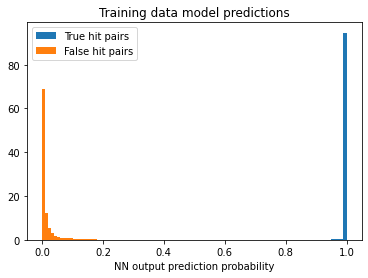

In [80]:
# plot distribution of training predictions
N_pred_train = len(y_train_mult_events)
pred_true_train = np.empty(int(N_pred_train/2), dtype=float)
pred_false_train = np.empty(int(N_pred_train/2), dtype=float)
true_counter = 0
false_counter = 0

for pred in range(N_pred_train):
    if (y_train_mult_events[pred] == True):
        pred_true_train[true_counter] = pred_train_mult_events[pred]
        true_counter += 1
    else:
        pred_false_train[false_counter] = pred_train_mult_events[pred]
        false_counter += 1
        

plt.hist(pred_true_train, bins=100, density=True, label="True hit pairs")
plt.hist(pred_false_train, bins=100, density=True, label="False hit pairs")
plt.xlabel("NN output prediction probability")
plt.title("Training data model predictions")
plt.legend()
plt.show()

In [81]:
pred_train_confusion_events = (pred_train_mult_events > 0.5)

confusion_train = metrics.confusion_matrix(y_train_mult_events, pred_train_confusion_events)
accuracy_train = metrics.accuracy_score(y_train_mult_events, pred_train_confusion_events)

print(confusion_train)
print(accuracy_train)

[[398683   1317]
 [  9298 390702]]
0.98673125


In [99]:
# save the model if needed 
model_mult.save("model_mult_20_20000")

INFO:tensorflow:Assets written to: model_mult_20_20000\assets


### Test model with data from multiple other events

In [49]:
# open saved model if needed
model_mult_saved = keras.models.load_model("model_mult_20_20000")

In [28]:
# first test with one event
hits_test, cells_test, particles_test, truth_test = load_event('../TrackML-Data/train_100_events/event000001099')

cells_arr_test, value_arr_test = cells_input_data(cells_test)
print(cells_arr_test.shape)

(117434,)


In [29]:
hit_pairs_test = brute_dataset(20000, hits_test, truth_test)
np.random.shuffle(hit_pairs_test)
print(hit_pairs_test.shape)

(40000,)


In [51]:
X_test_single, y_test_single = X_y_train_construct(hit_pairs_test, hits_test, cells_arr_test, value_arr_test)
print(X_test_single.shape)
print(y_test_single.shape)

(40000, 11)
(40000,)


In [88]:
pred_test_single = model_mult.predict(X_test_single)
#pred_test_single = model_mult_saved.predict(X_test_single)

1250/1250 [==============================] - 4s 4ms/step


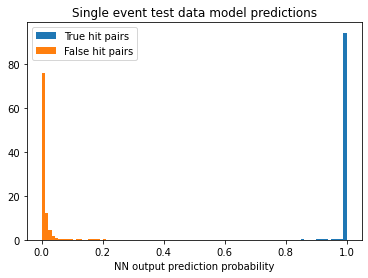

In [89]:
# plot distribution of one event test predictions
N_pred_test = len(y_test_single)
pred_true_test_single = np.empty(int(N_pred_test/2), dtype=float)
pred_false_test_single = np.empty(int(N_pred_test/2), dtype=float)
true_counter = 0
false_counter = 0

for pred in range(N_pred_test):
    if (y_test_single[pred] == True):
        pred_true_test_single[true_counter] = pred_test_single[pred]
        true_counter += 1
    else:
        pred_false_test_single[false_counter] = pred_test_single[pred]
        false_counter += 1
        

plt.hist(pred_true_test_single, bins=100, density=True, label="True hit pairs")
plt.hist(pred_false_test_single, bins=100, density=True, label="False hit pairs")
plt.xlabel("NN output prediction probability")
plt.title("Single event test data model predictions")
plt.legend()
plt.show()

In [90]:
pred_test_confusion = (pred_test_single > 0.5)

confusion_test = metrics.confusion_matrix(y_test_single, pred_test_confusion)
accuracy_test = metrics.accuracy_score(y_test_single, pred_test_confusion)

print(confusion_test)
print(accuracy_test)

[[19950    50]
 [  289 19711]]
0.991525


In [100]:
# same event with more pairs
hit_pairs_test = brute_dataset(30000, hits_test, truth_test)
np.random.shuffle(hit_pairs_test)
print(hit_pairs_test.shape)

(60000,)


In [101]:
X_test_single, y_test_single = X_y_train_construct(hit_pairs_test, hits_test, cells_arr_test, value_arr_test)
print(X_test_single.shape)
print(y_test_single.shape)

(60000, 11)
(60000,)


In [102]:
pred_test_single = model_mult.predict(X_test_single)

1875/1875 [==============================] - 7s 4ms/step


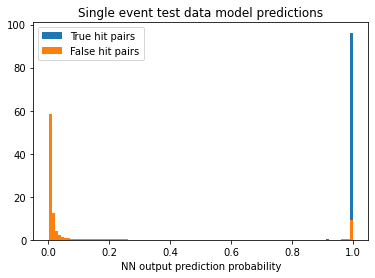

In [103]:
# plot distribution of one event test predictions
N_pred_test = len(y_test_single)
pred_true_test_single = np.empty(int(N_pred_test/2), dtype=float)
pred_false_test_single = np.empty(int(N_pred_test/2), dtype=float)
true_counter = 0
false_counter = 0

for pred in range(N_pred_test):
    if (y_test_single[pred] == True):
        pred_true_test_single[true_counter] = pred_test_single[pred]
        true_counter += 1
    else:
        pred_false_test_single[false_counter] = pred_test_single[pred]
        false_counter += 1
        

plt.hist(pred_true_test_single, bins=100, density=True, label="True hit pairs")
plt.hist(pred_false_test_single, bins=100, density=True, label="False hit pairs")
plt.xlabel("NN output prediction probability")
plt.title("Single event test data model predictions")
plt.legend()
plt.show()

In [104]:
pred_test_confusion = (pred_test_single > 0.5)

confusion_test = metrics.confusion_matrix(y_test_single, pred_test_confusion)
accuracy_test = metrics.accuracy_score(y_test_single, pred_test_confusion)

print(confusion_test)
print(accuracy_test)

[[26346  3654]
 [  289 29711]]
0.9342833333333334


In [61]:
# Now test with multiple events (events 50-55)
N_hits_event = 10000
X_test_50, y_test_50 = multiple_events_brute(5,N_hits_event,50)

(100000, 11)
(100000,)


In [105]:
pred_test_mult = model_mult.predict(X_test_50)
#pred_test_mult = model_mult_saved.predict(X_test_50)

3125/3125 [==============================] - 12s 4ms/step


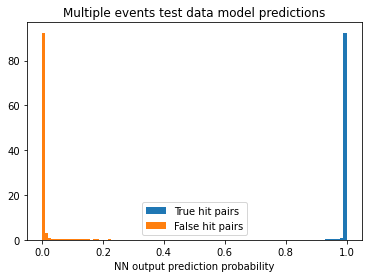

In [106]:
# plot distribution of predictions
N_pred_test_mult = len(y_test_50)
pred_true_test_mult = np.empty(int(N_pred_test_mult/2), dtype=float)
pred_false_test_mult = np.empty(int(N_pred_test_mult/2), dtype=float)
true_counter = 0
false_counter = 0

for pred in range(N_pred_test_mult):
    if (y_test_50[pred] == True):
        pred_true_test_mult[true_counter] = pred_test_mult[pred]
        true_counter += 1
    else:
        pred_false_test_mult[false_counter] = pred_test_mult[pred]
        false_counter += 1
        

plt.hist(pred_true_test_mult, bins=100, density=True, label="True hit pairs")
plt.hist(pred_false_test_mult, bins=100, density=True, label="False hit pairs")
plt.xlabel("NN output prediction probability")
plt.title("Multiple events test data model predictions")
plt.legend()
plt.show()

In [93]:
pred_test_confusion = (pred_test_mult > 0.5)

confusion_test = metrics.confusion_matrix(y_test_50, pred_test_confusion)
accuracy_test = metrics.accuracy_score(y_test_50, pred_test_confusion)

print(confusion_test)
print(accuracy_test)

[[49856   144]
 [ 1656 48344]]
0.982


In [94]:
# Now test with multiple events (events 60-70)
N_hits_event = 10000
X_test_60, y_test_60 = multiple_events_brute(10,N_hits_event,60)

(200000, 11)
(200000,)


In [107]:
pred_test_mult = model_mult.predict(X_test_60)

6250/6250 [==============================] - 23s 4ms/step


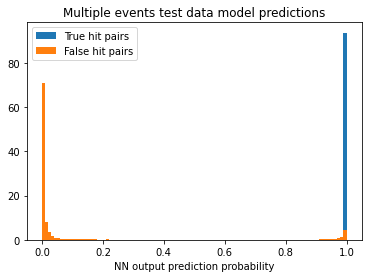

In [108]:
# plot distribution of predictions
N_pred_test_mult = len(y_test_60)
pred_true_test_mult = np.empty(int(N_pred_test_mult/2), dtype=float)
pred_false_test_mult = np.empty(int(N_pred_test_mult/2), dtype=float)
true_counter = 0
false_counter = 0

for pred in range(N_pred_test_mult):
    if (y_test_60[pred] == True):
        pred_true_test_mult[true_counter] = pred_test_mult[pred]
        true_counter += 1
    else:
        pred_false_test_mult[false_counter] = pred_test_mult[pred]
        false_counter += 1
        

plt.hist(pred_true_test_mult, bins=100, density=True, label="True hit pairs")
plt.hist(pred_false_test_mult, bins=100, density=True, label="False hit pairs")
plt.xlabel("NN output prediction probability")
plt.title("Multiple events test data model predictions")
plt.legend()
plt.show()

In [98]:
pred_test_confusion = (pred_test_mult > 0.5)

confusion_test = metrics.confusion_matrix(y_test_60, pred_test_confusion)
accuracy_test = metrics.accuracy_score(y_test_60, pred_test_confusion)

print(confusion_test)
print(accuracy_test)

[[90791  9209]
 [ 3118 96882]]
0.938365
